# Задание 1: Обработка изображений

Используйте библиотеку `Pillow` или `opencv python` для загрузки изображения в форматах jpg и png. Если загружен файл png, проверьте, содержит ли он прозрачные пиксели и если да, то сделайте такие пиксели белыми непрозрачными.

Изучите документацию библиотек: Перед началом работы обязательно ознакомьтесь с документацией библиотек Pillow и opencv python. Это поможет вам понять, какие функции доступны для загрузки и обработки изображений. Например, в Pillow вы можете использовать метод Image.open () для загрузки изображения, а в opencv python функцию cv2.imread(). Обратите внимание на параметры, которые позволяют работать с альфа каналом при загрузке PNG файлов.

In [5]:
pip install Pillow # Установка библиотеки Pillow, на всякий случай если она не установлена.

In [35]:
from PIL import Image

def process_image(file_path):
    # Загружаю изображение
    img = Image.open(file_path)
    print(f"Загружено изображение: {file_path}, формат: {img.format}, режим: {img.mode}")

    # Проверяю, является ли изображение PNG
    if img.format == 'PNG':
        print("Обрабатываем изображение PNG...")
        # Проверяю наличие альфа-канала (прозрачности)
        if img.mode in ('RGBA', 'LA') or (img.mode == 'P' and 'transparency' in img.info):
            print("Найдены прозрачные пиксели. Заменяем их на белые.")
            # Создаю новое изображение с белым фоном
            new_img = Image.new("RGB", img.size, (255, 255, 255))
            new_img.paste(img, (0, 0), img)  # Накладываю оригинальное изображение на белый фон
            img = new_img  # Переназначаю img на новое изображение
        else:
            print("Прозрачные пиксели не найдены.")

    # Сохраняю изображение в формате JPG
    output_path = file_path.rsplit('.', 1)[0] + '_processed.jpg'
    img.convert('RGB').save(output_path, 'JPEG')
    print(f"Изображение сохранено как: {output_path}")

Так как не мог найти прозрачное изображение, пришлось его генерировать.

In [36]:
from PIL import Image

def create_transparent_png(width, height, output_path):
    # Создаю новое изображение с прозрачным фоном
    transparent_img = Image.new("RGBA", (width, height), (255, 255, 255, 0))

    # Рисую красный прямоугольник с прозрачным фоном
    for x in range(50, 150):
        for y in range(50, 150):
            transparent_img.putpixel((x, y), (255, 0, 0, 255))  # Красный цвет (R, G, B, A)

    # Сохраняю изображение
    transparent_img.save(output_path, "PNG")
    print(f"Создано изображение: {output_path}")

# Применение функции для генерации
width = 300  # Ширина изображения
height = 300  # Высота изображения
output_path = "image.png"  # Путь для сохранения изображения
create_transparent_png(width, height, output_path)

Создано изображение: image.png


Не получалось выполнить код, так как программа не видела файл поэтому пришлось много тестировать и увеличивать объем кода заимствую код из Task3.

С помощью кода ниже проверяю, что программа видит файл.

Укажите полный путь до вашего изображения, при указании только имени файла не работает: /content/image.png


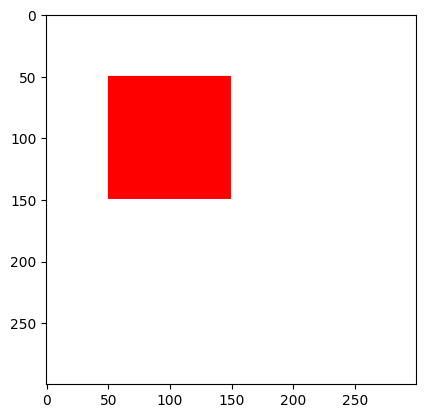

In [37]:
# Для проверки начального изображение. Оно должно существовать. Само оно не генерируется. Уже генерируется.

import matplotlib.pyplot as plt
from PIL import Image

# Нужно указывать полный путь до файла иначе не работает.
file_path = input("Укажите полный путь до вашего изображения, при указании только имени файла не работает: ")

try:
    image = Image.open(file_path) # При помощи open открываем изображение для работы с ним.
except FileNotFoundError:
    print("Файл не найден. Пожалуйста, проверьте имя файла.")
    exit()

plt.imshow(image)
plt.show() # Проверяю, что программа видит файл. Показывает значит видит.

Код ниже для вызова функции замены прозрачных пикселей файла формата png на белые.

In [38]:
# Нужно указывать полный путь до файла иначе не работает.
file_path = input("Укажите полный путь до вашего изображения, при указании только имени файла не работает: ")

# Наконец полсе того как я вижу, что программа видит файл выполняю функцию.
process_image(file_path)

Укажите полный путь до вашего изображения, при указании только имени файла не работает: /content/image.png
Загружено изображение: /content/image.png, формат: PNG, режим: RGBA
Обрабатываем изображение PNG...
Найдены прозрачные пиксели. Заменяем их на белые.
Изображение сохранено как: /content/image_processed.jpg


Исходное и конечное изображения выглядят одинаково, но по результату программы, разница есть и похоже все работает. Наконец-то.

# Задание 2: Обработка изображений

Реализуйте функции для изменения размера изображения, конвертации в черно белое и применения фильтра Гаусса (размытие).

Ознакомьтесь с функциями, которые предоставляют Pillow и opencv python для работы с изображениями. В Pillow вы можете использовать метод resize () для изменения размера, метод convert () для конвертации в черно белое, а также метод filter () с фильтром ImageFilter.GaussianBlur () для размытия. В opencv python используйте cv2.resize() для изменения размера, cv2.cvtColor() для конвертации в оттенки серого и cv2.GaussianBlur() для применения фильтра Гаусса.

Ниже сами функции.

In [50]:
from PIL import Image, ImageFilter

def resize_image(input_path, output_path, new_size):
    """Изменяет размер изображения."""
    img = Image.open(input_path)
    resized_img = img.resize(new_size)
    resized_img.save(output_path)
    print(f"Изображение изменено в размере и сохранено как: {output_path}")

def convert_to_black_and_white(input_path, output_path):
    """Конвертирует изображение в черно-белое."""
    img = Image.open(input_path)

    # Начал изобретать велосипед так как при отображении в косоли черно белого изображение красный показывало черным, а белый желтым.
    # При открытии файлов вне консоли файлы выглядят черно белыми.
    # Преобразую изображение в RGB, если оно не в RGB
    if img.mode != 'RGB':
        img = img.convert('RGB')

    # Конвертирую в черно-белое
    bw_img = img.convert("L")  # 'L' - это режим для черно-белого изображения
    bw_img.save(output_path)
    print(f"Изображение конвертировано в черно-белое и сохранено как: {output_path}")

def apply_gaussian_blur(input_path, output_path, radius):
    """Применяет фильтр Гаусса (размытие) к изображению."""
    img = Image.open(input_path)
    blurred_img = img.filter(ImageFilter.GaussianBlur(radius))
    blurred_img.save(output_path)
    print(f"Фильтр Гаусса применен и изображение сохранено как: {output_path}")

Запуск функции изменения размера изображения.

In [73]:
# Изменение размера изображения
input_image_path = input("Введите путь к входному изображению: ")
resized_image_path = "resized_image.png"

while True:
    try:
        width = int(input("Введите новую ширину изображения (в пикселях): "))
        height = int(input("Введите новую высоту изображения (в пикселях): "))
        new_size = (width, height)
        break
    except ValueError:
        print("Пожалуйста, введите целые числа для ширины и высоты.")

print(f"Изменение размера изображения на {new_size[0]}x{new_size[1]} пикселей...")
resize_image(input_image_path, resized_image_path, new_size)
print("Изменение размера завершено.")

Введите путь к входному изображению: /content/image.png
Введите новую ширину изображения (в пикселях): 10
Введите новую высоту изображения (в пикселях): 10
Изменение размера изображения на 10x10 пикселей...
Изображение изменено в размере и сохранено как: resized_image.png
Изменение размера завершено.


Запуск функции изменения на черно белое изображение изображения.

In [74]:
# Конвертация в черно-белое

input_image_path = input("Введите путь к входному изображению: ")
bw_image_path = "bw_image.png"

convert_to_black_and_white(input_image_path, bw_image_path)

Введите путь к входному изображению: /content/image.png
Изображение конвертировано в черно-белое и сохранено как: bw_image.png


Запуск функции применения размытия Гаусса.

In [75]:
# Применение размытия Гаусса
input_image_path = input("Введите путь к входному изображению: ")
blurred_image_path = "blurred_image.png"

# Проверка ввода радиуса размытия
while True:
    try:
        blur_radius = float(input("Введите радиус размытия (например, 5): "))
        if blur_radius < 0:
            print("Радиус размытия должен быть неотрицательным числом. Попробуйте еще раз.")
        else:
            break
    except ValueError:
        print("Пожалуйста, введите числовое значение для радиуса размытия.")

apply_gaussian_blur(input_image_path, blurred_image_path, blur_radius)

Введите путь к входному изображению: /content/image.png
Введите радиус размытия (например, 5): 5
Фильтр Гаусса применен и изображение сохранено как: blurred_image.png


Код ниже для проверки изображений.

Укажите полный путь до вашего изображения, при указании только имени файла не работает: /content/blurred_image.png


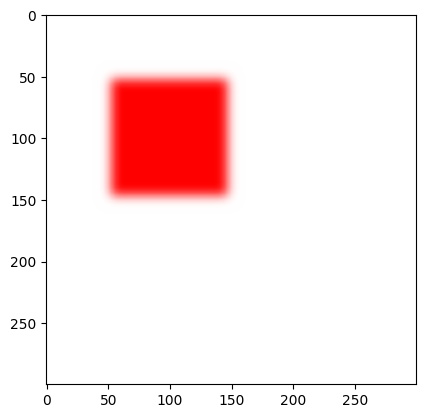

In [70]:
# Код для проверки начального и конечных изображений.
import matplotlib.pyplot as plt
from PIL import Image

# Нужно указывать полный путь до файла иначе не работает.
file_path = input("Укажите полный путь до вашего изображения, при указании только имени файла не работает: ")

try:
    image = Image.open(file_path) # При помощи open открываем изображение для работы с ним.
except FileNotFoundError:
    print("Файл не найден. Пожалуйста, проверьте имя файла.")
    exit()

plt.imshow(image)
plt.show() # Проверяю, что программа видит файл. Показывает значит видит.

# Задание 3: Использование Git

Научитесь делать коммиты изменений, создавать ветки и объединять их с основной веткой через `merge` или `rebase`. Опубликуйте ваш проект на GitHub , GitLab или другой платформе для ведения версий кода.

Для успешного выполнения задания внимательно ознакомьтесь с основными командами Git для работы с коммитами и ветками, а затем опубликуйте свой проект на выбранной платформе, следуя шагам для создания удаленного репозитория и настройки подключения.

# Задание 4: Использование Git

Научитесь делать коммиты изменений, создавать ветки и объединять их с основной веткой через merge или rebase. Опубликуйте ваш проект на GitHub, GitLab или другой платформе для ведения версий кода.

Для успешного выполнения задания внимательно ознакомьтесь с основными командами Git для работы с коммитами и ветками, а затем опубликуйте свой проект на выбранной платформе, следуя шагам для создания удаленного репозитория и настройки подключения.